<a href="https://colab.research.google.com/github/komalmagar/Image-recognation-using-DL/blob/main/Prcatical3(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist  #To import dataset
import matplotlib.pyplot as plt  ## for ploting data on graph
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [45]:
encoding_dim = 32 # size of inpute data n float
input_img = Input(shape=(784,)) ## size of input placeholder
encoded = Dense(encoding_dim, activation='relu')(input_img)# representation for input
decoded = Dense(784, activation='sigmoid')(encoded)# decodation for output 
autoencoder = Model(input_img, decoded)## modeling the data
encoder = Model(input_img, encoded)  ## map input to desired output
encoded_input = Input(shape=(encoding_dim,))## place holder for input
decoder_layer = autoencoder.layers[-1] ## get has row data by using [-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))# creating decoding model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #Compiling model


In [46]:
(x_train, _), (x_test, _) = mnist.load_data()  ##loading data
x_train = x_train.astype('float32') / 255.# normalise all value between 0 and 1
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)


(60000, 784)
(10000, 784)


In [47]:
autoencoder.fit(x_train, x_train,epochs=60,batch_size=256,shuffle=True,validation_data=(x_test, x_test))# FITTING THE MODEL with 50 iterations to update the weights for test data
cv = KFold(n_splits=10, random_state=1, shuffle=True)
encoded_imgs = encoder.predict(x_test)# encoding image for test data 
decoded_imgs = decoder.predict(encoded_imgs)# decoding for test data

Epoch 1/60
235/235 [==============================] - 3s 13ms/step - loss: 0.3848 - val_loss: 0.1867
Epoch 2/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1775 - val_loss: 0.1522
Epoch 3/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1488 - val_loss: 0.1344
Epoch 4/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1324 - val_loss: 0.1219
Epoch 5/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1210 - val_loss: 0.1136
Epoch 6/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1132 - val_loss: 0.1077
Epoch 7/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1080 - val_loss: 0.1034
Epoch 8/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1039 - val_loss: 0.1002
Epoch 9/60
235/235 [==============================] - 3s 12ms/step - loss: 0.1008 - val_loss: 0.0977
Epoch 10/60
235/235 [==============================] - 3s 12ms/step - loss: 0.0984 - val_lo

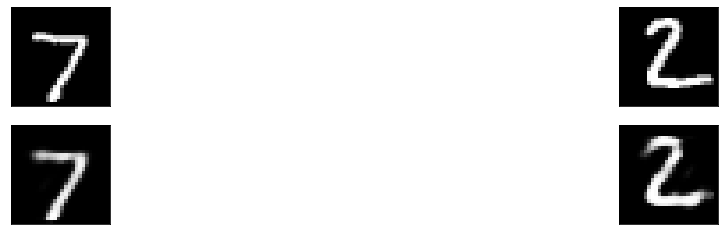

In [48]:
n = 2 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ax=plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

from sklearn.metrics import mean_squared_error   ## we are finding error rate
ms=mean_squared_error(x_test,decoded_imgs) 
MSE = np.square(np.subtract(x_test,decoded_imgs)).mean() 
MSE
ms

In [50]:
from sklearn.metrics import mean_squared_error ## we are finding error rate 
ms=mean_squared_error(x_test,decoded_imgs) 
MSE = np.square(np.subtract(x_test,decoded_imgs)).mean()
MSE 

0.0095905885

Difference Between "adam- optimizer" and "adadelta-optimizer"
**adaM**-It uses both first order moment mtmt and 2nd order moment gtgt but they are both decayed over time 

```

```


**adaDelta**-AdaDelta also uses exponentially decaying average of gtgt which was our 2nd moment of gradient.